In [6]:
import os
import sys
import pandas as pd
from sqlalchemy import create_engine, text


# Assuming the notebook is in 'notebooks/' and the project root is one level up
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to sys.path if it's not already there
if project_root not in sys.path:
    sys.path.append(project_root)

# Verify the path has been added (optional)
print(f"Project root added to sys.path: {project_root}")

Project root added to sys.path: d:\Projects\EDA-Clustering-Time-series---Regression-Model-Airbnb-Data


In [7]:
from database import get_sqlalchemy_engine
engine = get_sqlalchemy_engine()

✅ Successfully connected to SQL Server via pyodbc.
✅ SQLAlchemy engine created successfully.


✅ Loaded 1178740 rows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178740 entries, 0 to 1178739
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   listing_id              1178740 non-null  int64  
 1   total_weeks             1178740 non-null  int64  
 2   offline_weeks           1178740 non-null  int64  
 3   pct_offline_weeks       1178740 non-null  float64
 4   mean_availability       1178740 non-null  float64
 5   first_week              1178740 non-null  object 
 6   last_week               1178740 non-null  object 
 7   base_price              996981 non-null   float64
 8   number_of_reviews       1178740 non-null  int64  
 9   property_city           1178740 non-null  object 
 10  property_country        1178740 non-null  object 
 11  property_neighbourhood  1178740 non-null  object 
 12  latitude                1178740 non-null  float64
 13  longitude               1178740 no

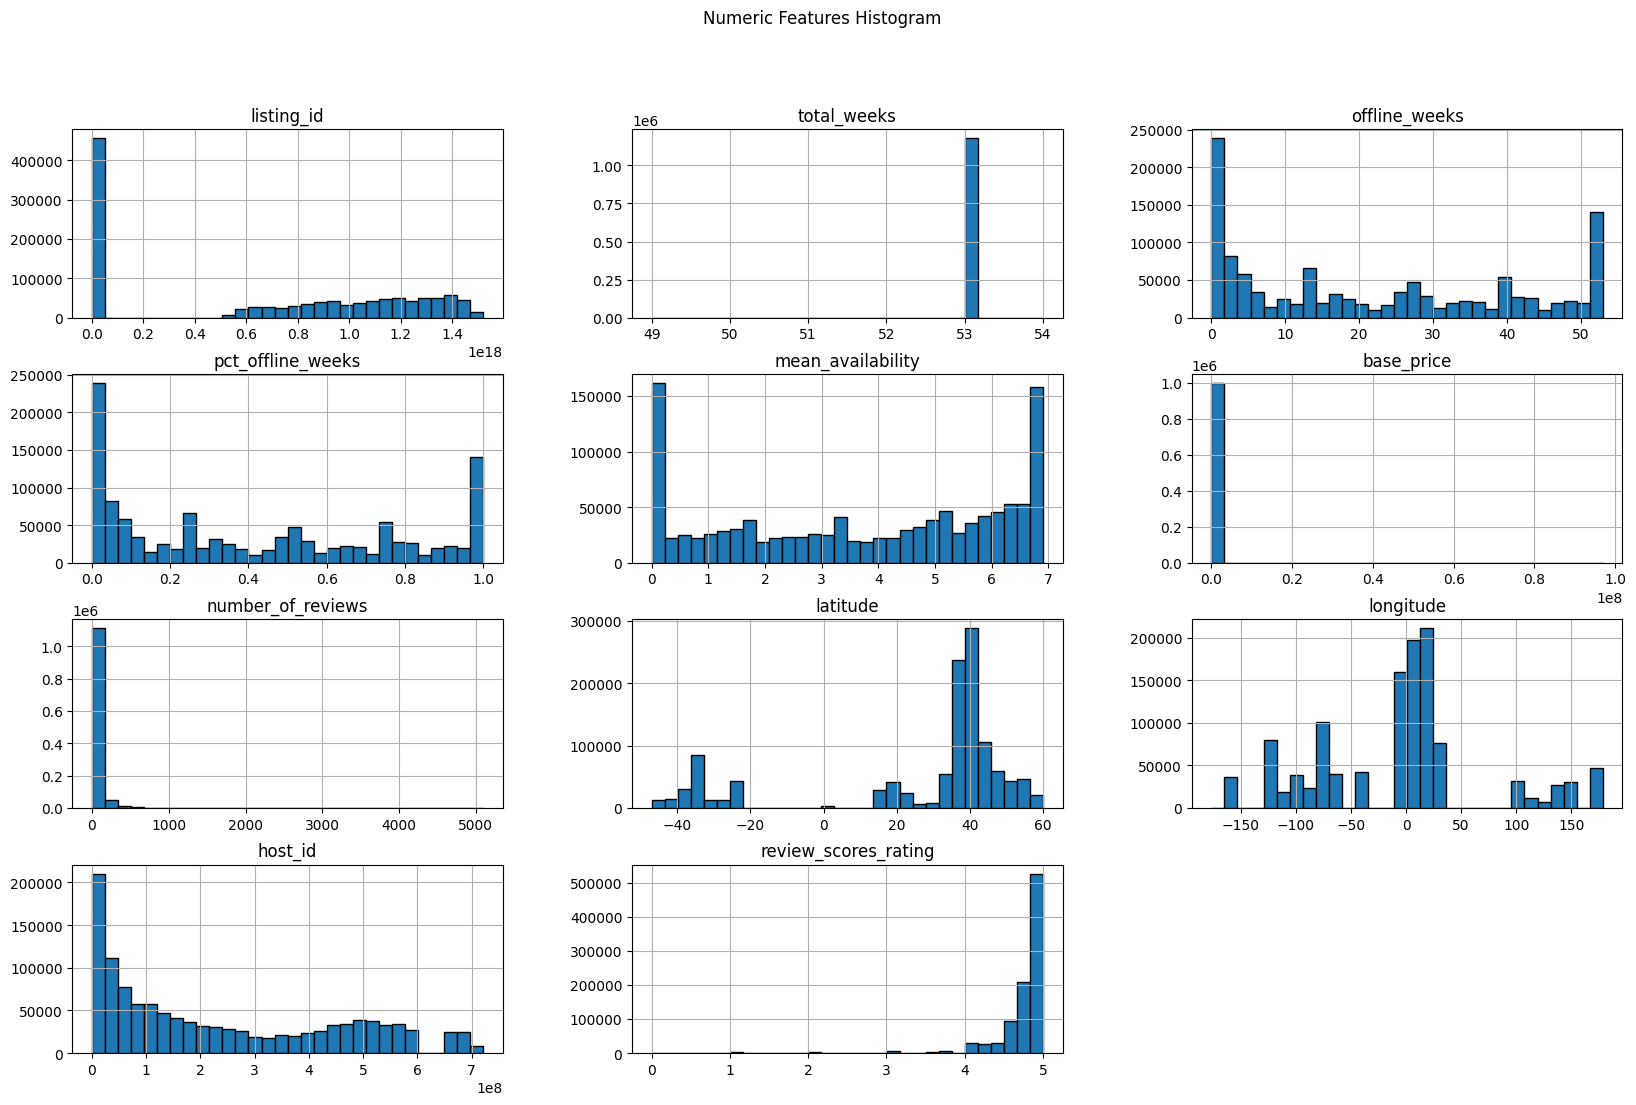

In [24]:
# Load full table
query = "SELECT * FROM listing_features"
df = pd.read_sql(query, engine)

print(f"✅ Loaded {len(df)} rows.")
print(df.info())
print(df.describe(include='all'))

# Check missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Numeric distributions
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumeric feature distributions:")
df[numeric_cols].hist(figsize=(20, 12), bins=30, edgecolor='k')
plt.suptitle("Numeric Features Histogram")
plt.show()


In [8]:
# Filter dataset
df_filtered = df[
    (df['base_price'].notna()) &          # base_price is not null
    (df['base_price'] > 0) &             # base_price > 0
    (df['pct_offline_weeks'] < 1)        # not offline 100% of the year
].copy()

print(f"✅ Filtered dataset: {len(df_filtered)} rows remaining.")
print(df_filtered[['listing_id', 'base_price', 'pct_offline_weeks']].head())


✅ Filtered dataset: 986250 rows remaining.
   listing_id  base_price  pct_offline_weeks
0         360       139.0           0.622642
1         364       179.0           0.018868
2         592        68.0           0.301887
3         686        42.0           0.622642
4         958       157.0           0.188679


In [25]:
# Keep only valid listings
df_filtered = df[
    (df['base_price'].notna()) &       # base_price exists
    (df['base_price'] > 0) &          # base_price > 0
    (df['pct_offline_weeks'] < 1)     # not offline 100% of the year
].copy()

print(f"✅ Filtered dataset: {len(df_filtered)} rows remaining.")


✅ Filtered dataset: 986250 rows remaining.


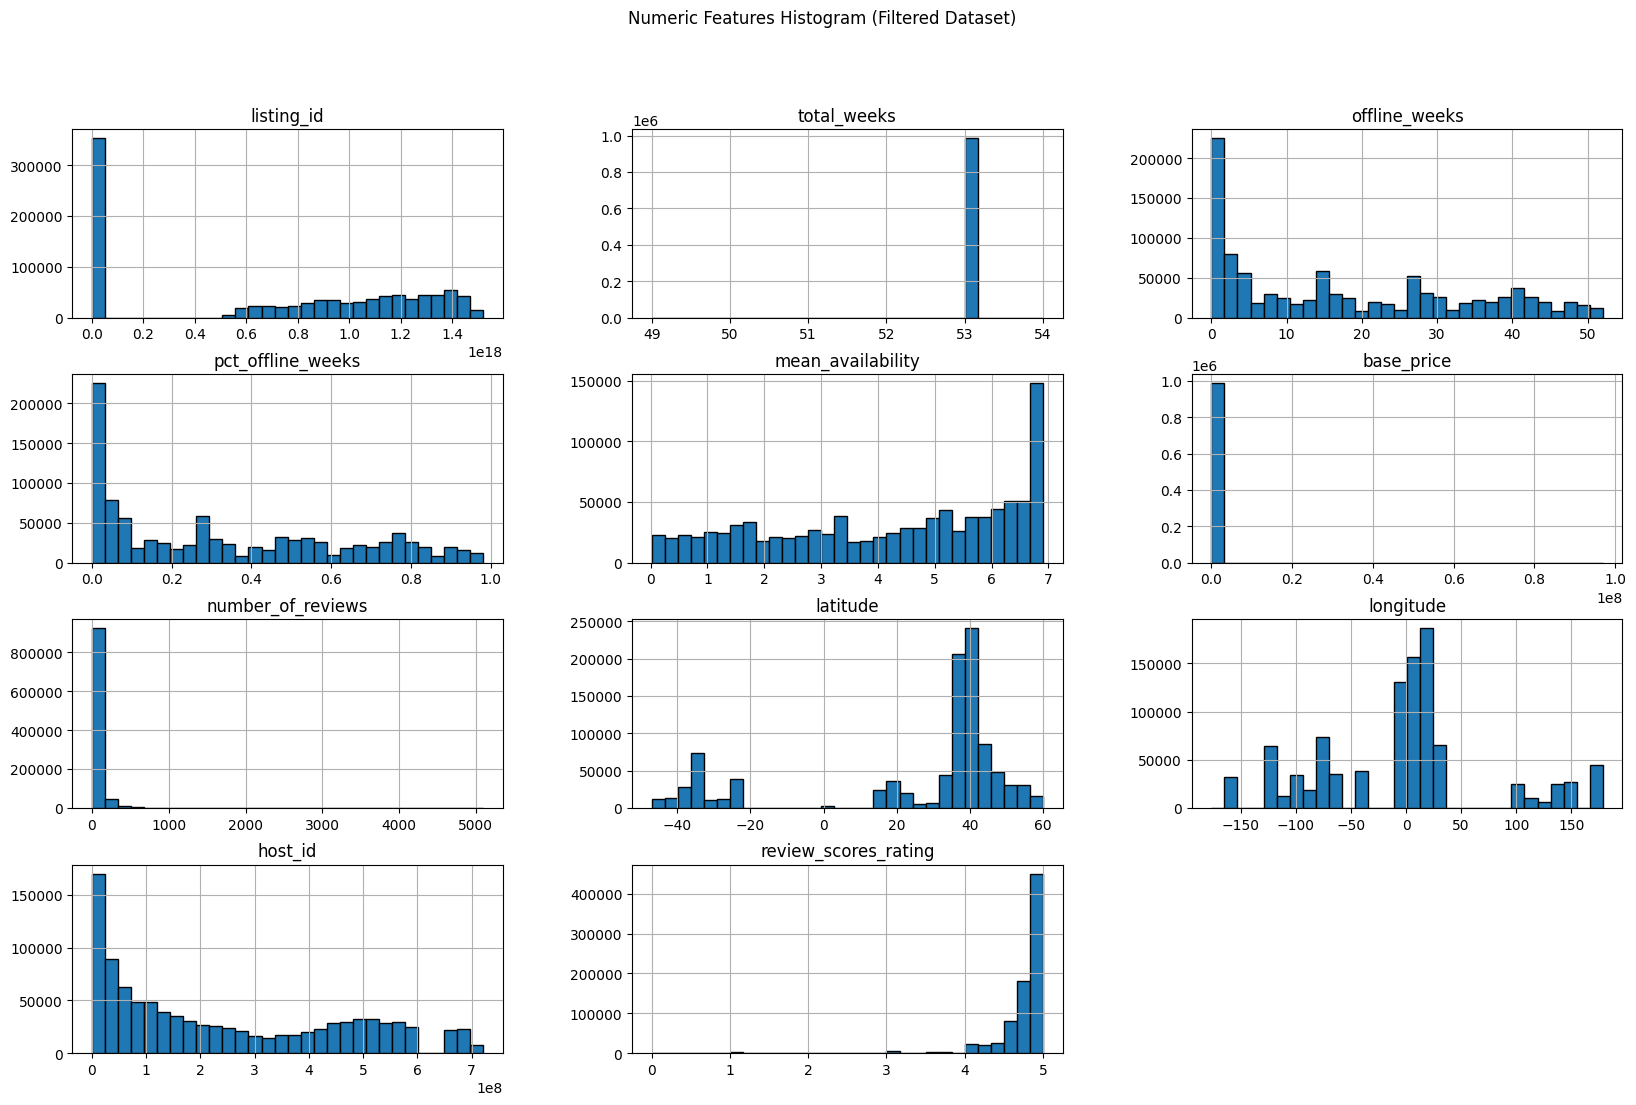

In [26]:
import matplotlib.pyplot as plt

numeric_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns
df_filtered[numeric_cols].hist(figsize=(20, 12), bins=30, edgecolor='k')
plt.suptitle("Numeric Features Histogram (Filtered Dataset)")
plt.show()



property_city - Top 20 values:
property_city
Sicily            50891
New Zealand       44295
Puglia            44013
Rio de Janeiro    38749
Los Angeles       36624
Rome              32219
Hawaii            31831
Buenos Aires      31407
South Aegean      31286
Ireland           25551
Istanbul          25469
Crete             25246
Tokyo             23174
Mexico City       22916
Bangkok           22548
Cape Town         22302
Lisbon            21419
New York City     21170
Girona            20172
Madrid            19144
Name: count, dtype: int64


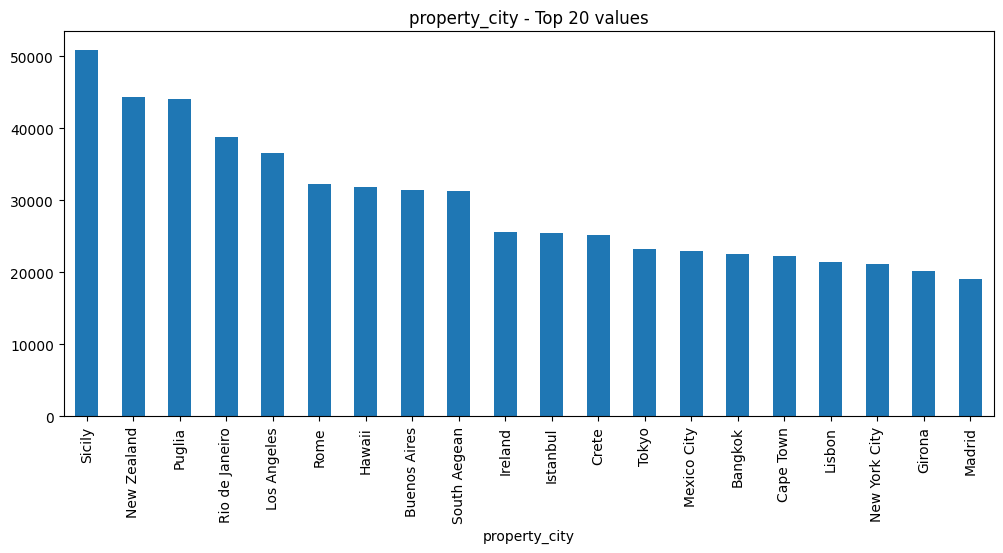


property_country - Top 20 values:
property_country
United States    161218
Italy            150296
Spain             93625
Greece            75841
New Zealand       44295
Australia         39323
Canada            39043
Brazil            38749
Portugal          34472
Argentina         31407
Ireland           25551
Turkey            25469
France            24068
Japan             23174
Mexico            22916
Thailand          22548
South Africa      22302
Germany           14694
Denmark           13678
Chile             12972
Name: count, dtype: int64


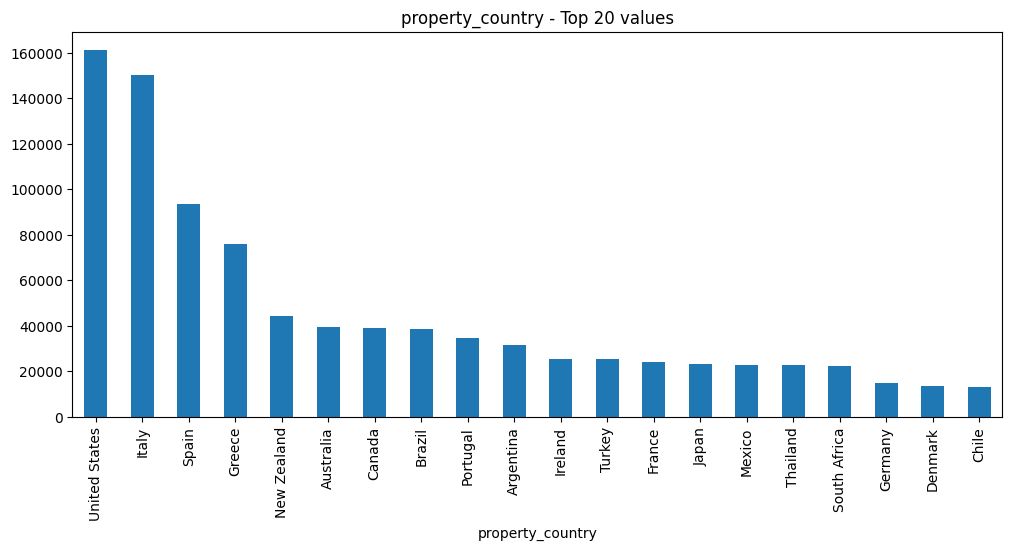


property_neighbourhood - Top 20 values:
property_neighbourhood
Unknown                                                 82404
Palermo                                                 17337
I Centro Storico                                        15776
Copacabana                                              11963
Cuauhtémoc                                              10825
Unincorporated Areas                                    10562
Centro                                                   7751
Trentino                                                 7566
Beyoglu                                                  6996
Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória     6737
Primary Urban Center                                     6466
Χανίων                                                   5544
Ρόδου (Rhodes)                                           5282
Θήρας (Santorini)                                        5159
Ward 115                                                 4966
Santia

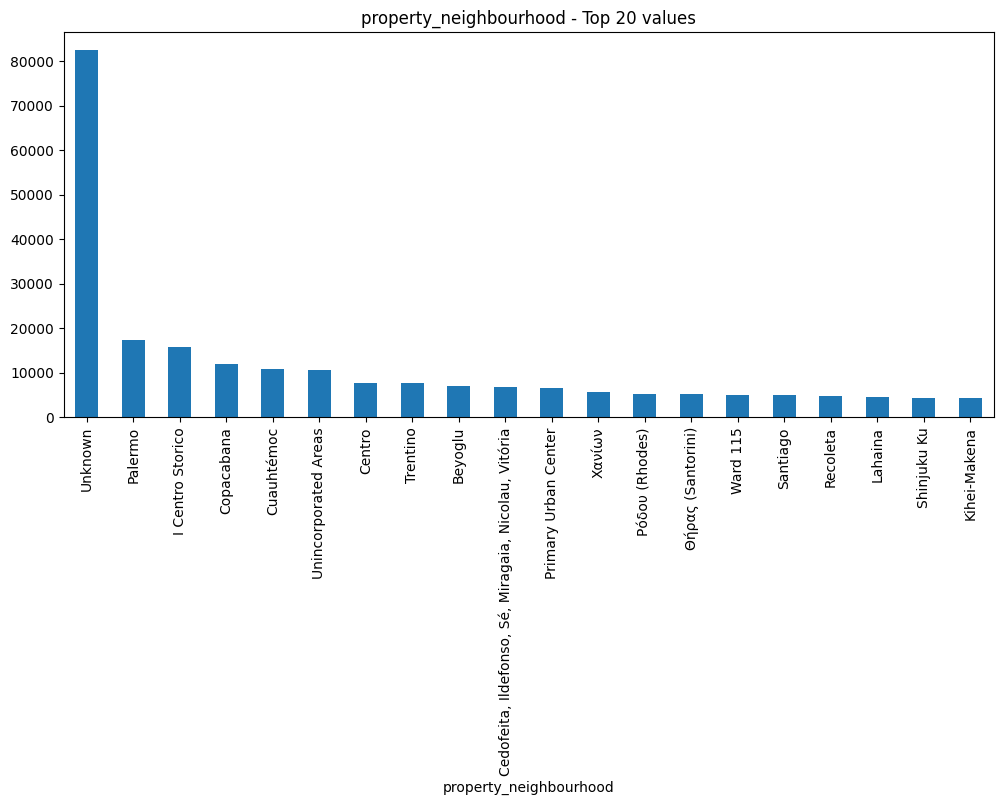

In [27]:
categorical_cols = df_filtered.select_dtypes(include=['object']).columns
# Exclude unwanted columns
excluded_cols = ['host_name', 'first_week', 'last_week']
categorical_cols = [col for col in categorical_cols if col not in excluded_cols]

for col in categorical_cols:
    top_values = df_filtered[col].value_counts().head(20)
    print(f"\n{col} - Top 20 values:\n{top_values}")
    top_values.plot(kind='bar', figsize=(12, 5))
    plt.title(f"{col} - Top 20 values")
    plt.show()
